In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [2]:
from keras.models import load_model
model_final= load_model('model_filter.h5')


In [3]:
#----------------------Custom Images----------------------------------------#
# categories = ['anger', 'disgust', 'fear', 'happy', 'sadness', 'surprise', 'z']
new_size=48
data_dir_custom=('./test')
x_test=[]

test_path = os.path.join(data_dir_custom)
for j in os.listdir(test_path):
        img = cv2.imread(os.path.join(test_path,j),cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(new_size,new_size))
        x_test.append(img)
        


In [4]:
x_test=np.array(x_test)
x_test=x_test/255.0
x_test=x_test.reshape(-1,new_size,new_size,1)
x_test.shape

(7, 48, 48, 1)

In [5]:
predictions = model_final.predict(x_test)
predicted_classes = np.argmax(predictions,axis=1)
print(predictions, predicted_classes)

[[2.8067121e-02 1.6197909e-09 4.6575769e-05 1.6158784e-03 9.6927935e-01
  1.8095053e-06 9.8923873e-04]
 [3.5794037e-05 4.6757855e-06 7.2105586e-06 9.8276085e-01 3.5440965e-04
  6.0539952e-07 1.6836425e-02]
 [9.9758220e-01 3.7740504e-09 2.4126435e-03 6.7958020e-08 1.7889267e-06
  1.8583579e-08 3.2057287e-06]
 [6.6315282e-05 2.5471236e-06 1.1966722e-03 7.4538599e-05 9.5512688e-01
  6.0904568e-08 4.3532975e-02]
 [9.9758220e-01 3.7740504e-09 2.4126435e-03 6.7958020e-08 1.7889267e-06
  1.8583579e-08 3.2057287e-06]
 [9.9758220e-01 3.7740504e-09 2.4126435e-03 6.7958020e-08 1.7889267e-06
  1.8583579e-08 3.2057287e-06]
 [9.9758220e-01 3.7740504e-09 2.4126435e-03 6.7958020e-08 1.7889267e-06
  1.8583579e-08 3.2057285e-06]] [4 3 0 4 0 0 0]


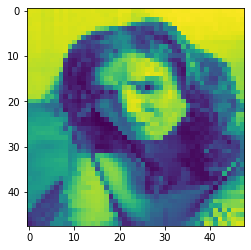

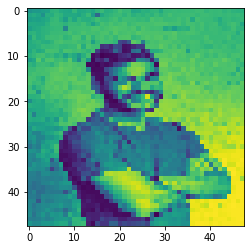

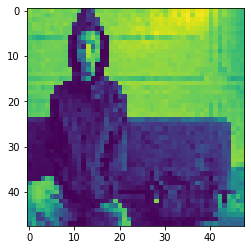

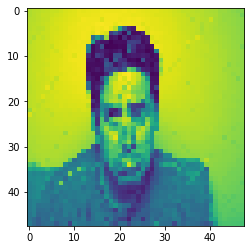

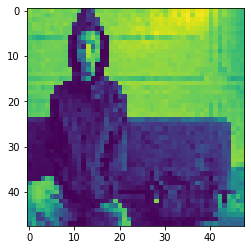

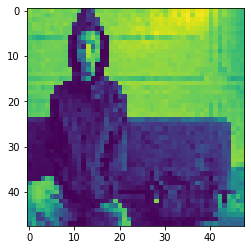

In [6]:
for i in range(len(predicted_classes)-1):
        plt.imshow(x_test[i])
        plt.show()
    

In [7]:
classes = {
    'TEST':['anger', 'disgust', 'fear', 'happy', 'sadness', 'surprise', 'z']}
for i in range(len(predicted_classes)):
     predicted_class = classes['TEST'][predicted_classes[i]]
     print("I think this image is among the {}.".format(predicted_class.lower()))

result = predicted_classes[0]

print(result)

I think this image is among the sadness.
I think this image is among the happy.
I think this image is among the anger.
I think this image is among the sadness.
I think this image is among the anger.
I think this image is among the anger.
I think this image is among the anger.
4


In [8]:
import tensorflowjs as tfjs

In [9]:
from keras.models import load_model
model_finala= load_model('model_filter.h5')

In [10]:
tfjs.converters.save_keras_model(model_finala, './model')